<a href="https://colab.research.google.com/github/betty6you/Jing_INFO5731_Spring2020/blob/main/In_class_exercise_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The seventh in-class-exercise (20 points in total, 3/16/2021)**

Question description: In the last in-class-exercise (exercise-06), you collected the titles of 100 articles about data science, natural language processing, and machine learning. The 100 article titles will be used as the text corpus of this exercise. Perform the following tasks:

## (1) (8 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [5]:
# Write your code here

import urllib.request
from bs4 import BeautifulSoup
import pandas as pd
import csv
import nltk 
import spacy 
from spacy.matcher import Matcher 
from spacy import displacy
from spacy.tokens import Span 
import math  
import string  
from tqdm import tqdm 
import re
import numpy as np 

mybaseURL="https://pubmed.ncbi.nlm.nih.gov/?term=chinese%20medicine%20epilepsy&page="
starURL=[]
newtitle=[]
for i in range(1,11):
  starURL=mybaseURL+str(i)

  with urllib.request.urlopen(starURL) as f:
    webpage=f.read()
    soup=BeautifulSoup(webpage)
  #print(soup)
    
  for item in soup.select('[data-rel-pos]'):
    newtitle.append(item.select('a.docsum-title')[0].get_text()) # The title of the article
    
df = pd.DataFrame({'Titles':newtitle})
df.to_csv('newtitle.csv',index = False)


In [36]:
from nltk.tokenize import RegexpTokenizer

from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim

tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()
    
doc_set = newtitle

# list for tokenized documents in loop
texts = []

# loop through document list
for i in doc_set:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in stop_words]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
print(dictionary)
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]
print(corpus)
# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=11, id2word = dictionary, passes=20)
print(ldamodel.print_topics(num_topics=8, num_words=4))

Dictionary(437 unique tokens: ['activ', 'chines', 'epilepsi', 'ingredi', 'mechan']...)
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)], [(1, 1), (2, 1), (5, 1), (7, 1), (9, 1)], [(1, 1), (2, 1), (5, 1), (7, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)], [(1, 1), (2, 1), (5, 1), (7, 1)], [(2, 1), (15, 1), (16, 1)], [(1, 1), (2, 1), (5, 1), (7, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1)], [(1, 1), (2, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1)], [(2, 1), (8, 1), (14, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1)], [(2, 1), (35, 1), (44, 1)], [(1, 1), (2, 2), (41, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1)], [(2, 1), (14, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1)], [(1, 1), (2, 1), (61, 1)], [(2, 1), (20, 1), (45, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1)], [(2, 1

The topics based on the result should be: epilpesy chinese medicine treatment

## (2) (8 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [10]:
# Write your code here

import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
def preprocess_data(doc_set):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts

cleaned_text=preprocess_data(newtitle)

In [ ]:
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix
(dictionary,doc_term_matrix)=prepare_corpus(cleaned_text)

In [25]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

create_gensim_lsa_model(cleaned_text,11,6)

[(0, '0.740*"epilepsi" + 0.485*"chines" + 0.177*"medicin" + 0.134*"treatment" + 0.132*"tradit" + 0.125*"associ"'), (1, '-0.510*"medicin" + -0.416*"tradit" + -0.293*"chines" + 0.248*"analysi" + 0.215*"associ" + 0.200*"epilepsi"'), (2, '0.447*"chines" + -0.327*"epilepsi" + 0.316*"associ" + -0.305*"treatment" + 0.215*"polymorph" + 0.186*"han"'), (3, '0.336*"valid" + 0.297*"version" + -0.284*"medicin" + -0.232*"drug" + -0.213*"associ" + 0.209*"inventori"'), (4, '0.403*"analysi" + -0.337*"drug" + 0.315*"review" + 0.293*"meta" + 0.272*"systemat" + -0.205*"resist"'), (5, '0.316*"patient" + -0.284*"drug" + -0.236*"valid" + -0.216*"china" + -0.214*"version" + -0.160*"inventori"'), (6, '0.355*"patient" + 0.303*"drug" + 0.274*"antiepilept" + -0.187*"han" + 0.185*"advers" + -0.185*"polymorph"'), (7, '0.462*"treatment" + -0.341*"use" + 0.193*"studi" + 0.170*"polymorph" + -0.141*"novel" + 0.136*"relat"'), (8, '-0.357*"effect" + 0.219*"tradit" + 0.214*"review" + -0.210*"patient" + -0.202*"analysi" + 

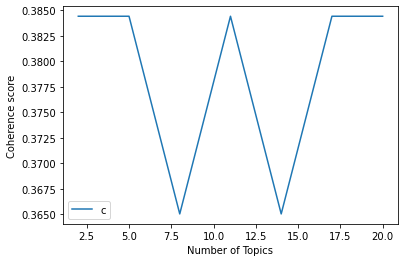

In [24]:
#optimized the topic numbers by coherence
#determine topic number
number_of_topics=6
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values
compute_coherence_values(dictionary, doc_term_matrix,cleaned_text,14,start=2,step=3)

def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

plot_graph(cleaned_text,2, 22, 3)

Based on the result, the topic should be : epilepsy Chinese medicine treatment

## (3) (4 points) Compare the results generated by the two topic modeling algorithms, which one is better? You should explain the reasons in details.

In [38]:
# Write your answer here (no code needed for this question)



LSA algorithm is the simplest method which is easy to understand and implement. It also offers better results compared to the vector space model. It is faster compared to other available algorithms because it involves document term matrix decomposition only.

Latent topic dimension depends upon the rank of the matrix so we can't extend that limit. LSA decomposed matrix is a highly dense matrix, so it is difficult to index individual dimension. LSA unable to capture the multiple meanings of words. It is not easier to implement compared to LDA( latent Dirichlet allocation). It offers lower accuracy than LDA.

So LDA is better than LSA.